In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp

from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, f1_score

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
holistic = mp_holistic.Holistic(min_detection_confidence = 0.8, min_tracking_confidence = 0.5)

In [3]:
IMAGESET_FOLDER = os.path.join('Imageset')
KEYPOINT_FOLDER = os.path.join('Extracted Hand Landmarks')
DATASET_FOLDER = os.path.join('Dataset')
actions = np.array(['Kol', 'live'])
no_sequences = 120
no_frames = 30

In [4]:
log_dir = os.path.join('Logs')
tb_callbacks = TensorBoard(log_dir = log_dir)

In [5]:
label_map = {label:num for num, label in enumerate(actions)}

sequences, labels= [], []
for action in range(len(actions)):
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(no_frames):
            res = np.load(os.path.join(DATASET_FOLDER, actions[action], str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[actions[action]])
        
x = np.array(sequences)
y = to_categorical(labels).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [6]:
x_train.shape

(192, 30, 199)

In [7]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30, 199)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            67584     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 222,114
Trainable params: 222,114
Non-trai

In [9]:
learn = model.fit(
    x_train, 
    y_train, 
    validation_data = (x_test, y_test), 
    epochs = 200, 
    callbacks = [tb_callbacks]
)

Epoch 1/200
6/6 [==============================] - 2s 109ms/step - loss: 37.3270 - categorical_accuracy: 0.5833 - val_loss: 29.0801 - val_categorical_accuracy: 0.4375
Epoch 2/200
6/6 [==============================] - 0s 34ms/step - loss: 25.9103 - categorical_accuracy: 0.5833 - val_loss: 30.6926 - val_categorical_accuracy: 0.6042
Epoch 3/200
6/6 [==============================] - 0s 31ms/step - loss: 37.8597 - categorical_accuracy: 0.5729 - val_loss: 13.2581 - val_categorical_accuracy: 0.6667
Epoch 4/200
6/6 [==============================] - 0s 31ms/step - loss: 40.8595 - categorical_accuracy: 0.5052 - val_loss: 29.4252 - val_categorical_accuracy: 0.5625
Epoch 5/200
6/6 [==============================] - 0s 31ms/step - loss: 35.3013 - categorical_accuracy: 0.5104 - val_loss: 35.1787 - val_categorical_accuracy: 0.4167
Epoch 6/200
6/6 [==============================] - 0s 31ms/step - loss: 36.9567 - categorical_accuracy: 0.5260 - val_loss: 30.4849 - val_categorical_accuracy: 0.5208
Epo

Epoch 50/200
6/6 [==============================] - 0s 30ms/step - loss: 3575.0828 - categorical_accuracy: 0.5365 - val_loss: 2112.3574 - val_categorical_accuracy: 0.4375
Epoch 51/200
6/6 [==============================] - 0s 34ms/step - loss: 8852.4209 - categorical_accuracy: 0.4844 - val_loss: 5757.7710 - val_categorical_accuracy: 0.4375
Epoch 52/200
6/6 [==============================] - 0s 36ms/step - loss: 7361.6333 - categorical_accuracy: 0.5208 - val_loss: 10493.7861 - val_categorical_accuracy: 0.5625
Epoch 53/200
6/6 [==============================] - 0s 37ms/step - loss: 11350.5938 - categorical_accuracy: 0.5312 - val_loss: 17642.0410 - val_categorical_accuracy: 0.4375
Epoch 54/200
6/6 [==============================] - 0s 33ms/step - loss: 8590.5703 - categorical_accuracy: 0.5417 - val_loss: 14910.2139 - val_categorical_accuracy: 0.5625
Epoch 55/200
6/6 [==============================] - 0s 33ms/step - loss: 26247.9238 - categorical_accuracy: 0.4844 - val_loss: 4771.5278 - va

Epoch 99/200
6/6 [==============================] - 0s 35ms/step - loss: 7.0944 - categorical_accuracy: 0.8906 - val_loss: 2.6212 - val_categorical_accuracy: 0.9583
Epoch 100/200
6/6 [==============================] - 0s 33ms/step - loss: 5.8825 - categorical_accuracy: 0.8750 - val_loss: 1.2691 - val_categorical_accuracy: 0.9583
Epoch 101/200
6/6 [==============================] - 0s 30ms/step - loss: 6.5244 - categorical_accuracy: 0.8750 - val_loss: 0.0831 - val_categorical_accuracy: 0.9583
Epoch 102/200
6/6 [==============================] - 0s 35ms/step - loss: 8.3254 - categorical_accuracy: 0.8073 - val_loss: 0.7073 - val_categorical_accuracy: 0.9583
Epoch 103/200
6/6 [==============================] - 0s 36ms/step - loss: 7.8281 - categorical_accuracy: 0.8281 - val_loss: 0.7455 - val_categorical_accuracy: 0.9792
Epoch 104/200
6/6 [==============================] - 0s 35ms/step - loss: 3.7541 - categorical_accuracy: 0.8542 - val_loss: 0.7289 - val_categorical_accuracy: 0.9583
Epoch

6/6 [==============================] - 0s 35ms/step - loss: 4.2555 - categorical_accuracy: 0.8073 - val_loss: 0.1477 - val_categorical_accuracy: 0.9583
Epoch 149/200
6/6 [==============================] - 0s 33ms/step - loss: 4.4295 - categorical_accuracy: 0.8854 - val_loss: 1.9775 - val_categorical_accuracy: 0.8958
Epoch 150/200
6/6 [==============================] - 0s 35ms/step - loss: 2.2023 - categorical_accuracy: 0.8958 - val_loss: 0.1555 - val_categorical_accuracy: 0.9583
Epoch 151/200
6/6 [==============================] - 0s 33ms/step - loss: 1.6446 - categorical_accuracy: 0.9062 - val_loss: 0.3058 - val_categorical_accuracy: 0.9583
Epoch 152/200
6/6 [==============================] - 0s 32ms/step - loss: 1.1549 - categorical_accuracy: 0.9219 - val_loss: 0.3420 - val_categorical_accuracy: 0.9375
Epoch 153/200
6/6 [==============================] - 0s 35ms/step - loss: 1.3696 - categorical_accuracy: 0.9062 - val_loss: 0.5497 - val_categorical_accuracy: 0.9167
Epoch 154/200
6/6 

6/6 [==============================] - 0s 33ms/step - loss: 0.6940 - categorical_accuracy: 0.8958 - val_loss: 0.5156 - val_categorical_accuracy: 0.9375
Epoch 198/200
6/6 [==============================] - 0s 33ms/step - loss: 0.5178 - categorical_accuracy: 0.9323 - val_loss: 0.4652 - val_categorical_accuracy: 0.9583
Epoch 199/200
6/6 [==============================] - 0s 31ms/step - loss: 0.4485 - categorical_accuracy: 0.9271 - val_loss: 1.1567 - val_categorical_accuracy: 0.9167
Epoch 200/200
6/6 [==============================] - 0s 36ms/step - loss: 0.8884 - categorical_accuracy: 0.9115 - val_loss: 0.7261 - val_categorical_accuracy: 0.9583


In [16]:
# model.save('DualFixed.h5')

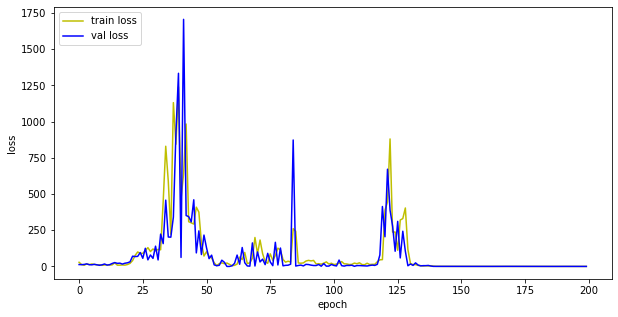

In [40]:
fig, loss_graph = plt.subplots(figsize=(10, 5))
# acc_ax = loss_ax.twinx()

loss_graph.plot(learn.history['loss'], 'y', label='train loss')
loss_graph.plot(learn.history['val_loss'], 'b', label='val loss')
loss_graph.set_xlabel('epoch')
loss_graph.set_ylabel('loss')
loss_graph.legend(loc = 'upper left')
plt.savefig('DualFixed_loss_plot_curve.jpg')
plt.show()

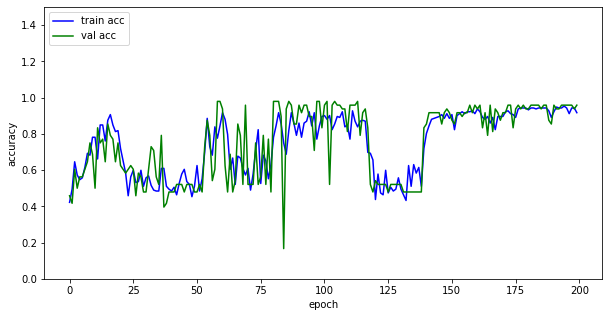

In [41]:
fig, acc_graph = plt.subplots(figsize = (10, 5))

acc_graph.plot(learn.history['categorical_accuracy'], 'b', label='train acc')
acc_graph.plot(learn.history['val_categorical_accuracy'], 'g', label='val acc')
acc_graph.set_xlabel('epoch')
acc_graph.set_ylabel('accuracy')
acc_graph.set_ylim([0, 1.5])
acc_graph.legend(loc = 'upper left')
plt.savefig('DualFixed_train_plot_curve.jpg')
plt.show()

In [10]:
x_pred = model.predict(x_test)

In [11]:
y_true = np.argmax(y_test, axis = 1).tolist()

In [12]:
x_pred = np.argmax(x_pred, axis = 1).tolist()

In [13]:
x_pred

[0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1]

In [14]:
y_true

[0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1]

In [47]:
mul_conf_mx = multilabel_confusion_matrix(y_true, x_pred)

In [48]:
mul_conf_mx

array([[[23,  0],
        [ 2, 23]],

       [[23,  2],
        [ 0, 23]]], dtype=int64)

In [49]:
conf_mx = confusion_matrix(y_true, x_pred)

In [50]:
conf_mx

array([[23,  2],
       [ 0, 23]], dtype=int64)

In [15]:
accuracy_score(y_true, x_pred)

0.9583333333333334

In [51]:
accuracy_score(y_true, x_pred)

0.9583333333333334

[0. 1.]


<Figure size 6480x6480 with 0 Axes>

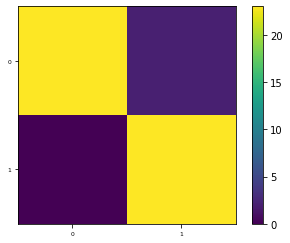

<Figure size 6480x6480 with 0 Axes>

In [54]:
ticks = np.linspace(0, 1, num = 2)
print(ticks)
# ticks = actions
plt.imshow(conf_mx, interpolation = 'none')
plt.colorbar()
plt.xticks(ticks, fontsize = 6)
plt.yticks(ticks, fontsize = 6)
plt.savefig('DualFixed_confusion_matrix.jpg')
plt.figure(figsize = (90, 90))